In [1]:
# Load autoreload extension
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F

plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{mathtools}")
plt.rc("font", size=10, family="serif", serif="cm")
plt.rc("figure", figsize=(1.8, 1.5))

In [3]:
def uniform_mgf(t, a, b):
    out = torch.exp(b * t) - torch.exp(a * t)
    tmp = t * (b - a)
    tmp[tmp==0] = 1e10
    out /= tmp
    return out

In [4]:
def plot(t, std, bia, a, b, real, clip=None, savename=None):
    if real:
        z = uniform_mgf(t, bia, std + bia)
        z -= uniform_mgf(t, a, b)
        loss = torch.mean(z**2, dim=0)
    else:
        z = uniform_mgf(1j * t, bia, std + bia)
        z -= uniform_mgf(1j * t, a, b)
        loss = torch.mean(z.real**2, dim=0) + torch.mean(z.imag**2, dim=0)

    Z = np.clip(loss.numpy(), 0, clip)
    X, Y = np.meshgrid(bia.numpy().squeeze(), std.numpy().squeeze())

    fig, ax = plt.subplots()
    c = plt.contourf(X, Y, Z)
    ax.set_xlabel("Bias")
    ax.set_ylabel("Std")
    fig.colorbar(c)
    # if savename is not None:
    #     fig.savefig(savename, bbox_inches="tight")

In [5]:
a, b = 3, 5
nb_params = 100

real = True
t = torch.linspace(.1, 1, 10).view(-1, 1, 1)

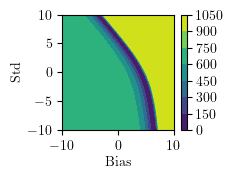

In [6]:
# Compute outputs for different parameters
std = torch.linspace(-10, 10, nb_params).view(1, -1, 1)
bia = torch.linspace(-10, 10, 2*nb_params).view(1, 1, -1)
save_name = f"uni_{real}_coarse.pdf"
plot(t, std, bia, a, b, real, clip=1e3, savename=save_name)

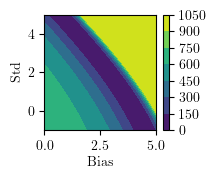

In [7]:
std = torch.linspace((b - a) - 3, (b - a) + 3, nb_params).view(1, -1, 1)
bia = torch.linspace(a - 3, a + 2, 2*nb_params).view(1, 1, -1)
save_name = f"uni_{real}_med.pdf"
plot(t, std, bia, a, b, real, clip=1e3, savename=save_name)

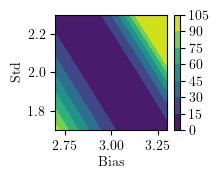

In [8]:
std = torch.linspace((b - a) - .3, (b - a) + .3, nb_params).view(1, -1, 1)
bia = torch.linspace(a - .3, a + .3, 2*nb_params).view(1, 1, -1)
save_name = f"uni_{real}_fine.pdf"
plot(t, std, bia, a, b, real, clip=1e2, savename=save_name)

In [9]:
real = False
t = torch.linspace(1, 100, 100).view(-1, 1, 1)

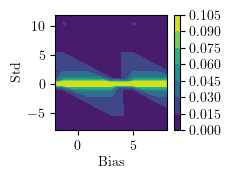

In [10]:
std = torch.linspace((b - a) - 10, (b - a) + 10, nb_params).view(1, -1, 1)
bia = torch.linspace(a - 5, a + 5, 2*nb_params).view(1, 1, -1)
save_name = f"uni_{real}_coarse.pdf"
plot(t, std, bia, a, b, real, clip=1e-1, savename=save_name)

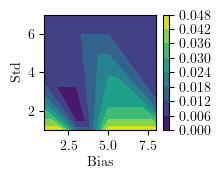

In [11]:
std = torch.linspace((b - a) - 1, (b - a) + 5, nb_params).view(1, -1, 1)
bia = torch.linspace(a - 2, a + 5, 2*nb_params).view(1, 1, -1)
save_name = f"uni_{real}_med.pdf"
plot(t, std, bia, a, b, real, clip=1e-1, savename=save_name)

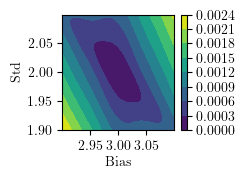

In [12]:
std = torch.linspace((b - a) - .1, (b - a) + .1, nb_params).view(1, -1, 1)
bia = torch.linspace(a - .1, a + .1, 2*nb_params).view(1, 1, -1)
save_name = f"uni_{real}_fine.pdf"
plot(t, std, bia, a, b, real, clip=1e-1, savename=save_name)